In [15]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('data/AirQuality.csv', delimiter=';')

# Convertir las fechas y horas
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
# Crear las variables derivadas de 'Date'
df['Dia'] = df['Date'].dt.day
df['Mes'] = df['Date'].dt.month
df['Anio'] = df['Date'].dt.year

df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S', errors='coerce').dt.time

# Mapear días de la semana a números
df['DiaSemana'] = df['Date'].dt.day_name()
dias_semana_map = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
df['DiaSemana'] = df['DiaSemana'].map(dias_semana_map)

# Categorizar por partes del día
def time_to_period(hour):
    if 6 <= hour < 12:
        return 0 #Día
    elif 12 <= hour < 18:
        return 1 #Tarde
    else:
        return 2 #Noche

df['PeriodoDia'] = df['Time'].apply(lambda t: time_to_period(t.hour) if pd.notnull(t) else None)

# Reemplazar comas por puntos y convertir columnas a float
columns_to_convert = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
for col in columns_to_convert:
    df[col] = df[col].str.replace(',', '.', regex=False).astype(float)

# Convertir todas las columnas numéricas a enteros si no tienen decimales
for col in df.select_dtypes(include=['float', 'int']).columns:
    if df[col].dropna().mod(1).eq(0).all():  # Verifica si todos los valores son enteros
        df[col] = df[col].astype('Int64')  # Convierte a entero compatible con NaN

# Configuración para que no muestre decimales en pandas
pd.set_option('display.float_format', '{:.0f}'.format)

# Eliminar columnas innecesarias
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'Time'], errors='ignore')

# Eliminar filas con valores faltantes
df_cleaned = df.dropna()

# Mostrar información y primeros registros
print("Tipos de datos:")
print(df_cleaned.dtypes)
print("\nPrimeros registros:")
print(df_cleaned.head())


Tipos de datos:
Date             datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)               Int64
NMHC(GT)                  Int64
C6H6(GT)                float64
PT08.S2(NMHC)             Int64
NOx(GT)                   Int64
PT08.S3(NOx)              Int64
NO2(GT)                   Int64
PT08.S4(NO2)              Int64
PT08.S5(O3)               Int64
T                       float64
RH                      float64
AH                      float64
Dia                       Int64
Mes                       Int64
Anio                      Int64
DiaSemana                 Int64
PeriodoDia                Int64
dtype: object

Primeros registros:
        Date  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10       3         1360       150        12           1046      166   
1 2004-03-10       2         1292       112         9            955      103   
2 2004-03-10       2         1402        88         9            939      131   
3 2004-03-10     

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas relevantes de gases contaminantes
gases_contaminantes = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# Convertir las columnas de gases contaminantes a tipo numérico, manejando errores
df[gases_contaminantes] = df[gases_contaminantes].apply(pd.to_numeric, errors='coerce')

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las columnas de gases contaminantes
df[gases_contaminantes] = scaler.fit_transform(df[gases_contaminantes])

# Calcular la media de los gases contaminantes para cada fila
df['indeceContaminacion'] = df[gases_contaminantes].mean(axis=1)

# Normalizar el índice usando MinMaxScaler
df['indeceContaminacion'] = scaler.fit_transform(df[['indeceContaminacion']])

# Mostrar el resultado
print(df[['indeceContaminacion']].head())

   indeceContaminacion
0                    1
1                    1
2                    1
3                    1
4                    1


In [17]:
import pandas as pd
from datetime import datetime

# Convertir la columna Date a formato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Función para determinar la estación del año
def obtener_estacion(fecha):
    if pd.isna(fecha):
        return None

    year = fecha.year
    # Fechas límite para las estaciones
    invierno_inicio = datetime(year, 12, 21)
    invierno_fin = datetime(year, 3, 20)
    primavera_inicio = datetime(year, 3, 21)
    primavera_fin = datetime(year, 6, 20)
    verano_inicio = datetime(year, 6, 21)
    verano_fin = datetime(year, 9, 23)
    otono_inicio = datetime(year, 9, 24)
    otono_fin = datetime(year, 12, 20)

    if fecha >= invierno_inicio or fecha <= invierno_fin:
        return 0  # Invierno
    elif primavera_inicio <= fecha <= primavera_fin:
        return 1  # Primavera
    elif verano_inicio <= fecha <= verano_fin:
        return 2  # Verano
    elif otono_inicio <= fecha <= otono_fin:
        return 3  # Otoño

# Aplicar la función para crear la nueva columna
df['EstacionAnio'] = df['Date'].apply(obtener_estacion)

# Mostrar el resultado
print(df[['Date', 'EstacionAnio']])

           Date  EstacionAnio
0    2004-03-10             0
1    2004-03-10             0
2    2004-03-10             0
3    2004-03-10             0
4    2004-03-10             0
...         ...           ...
9466        NaT           NaN
9467        NaT           NaN
9468        NaT           NaN
9469        NaT           NaN
9470        NaT           NaN

[9471 rows x 2 columns]


In [21]:
# Eliminar filas con valores faltantes
df_cleaned = df.dropna()

# Verificar el DataFrame limpio
print(df_cleaned)

           Date  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0    2004-03-10       1         1360         0         1           1046   
1    2004-03-10       1         1292         0         1            955   
2    2004-03-10       1         1402         0         1            939   
3    2004-03-10       1         1376         0         1            948   
4    2004-03-10       1         1272         0         1            836   
...         ...     ...          ...       ...       ...            ...   
9352 2005-04-04       1         1314         0         1           1101   
9353 2005-04-04       1         1163         0         1           1027   
9354 2005-04-04       1         1142         0         1           1063   
9355 2005-04-04       1         1003         0         1            961   
9356 2005-04-04       1         1071         0         1           1047   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  ...  T  RH  AH  Dia  Mes  \
0           0      

In [19]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [24]:
# Separamos la columna "species", que contiene la especie de pez, del resto de columnas.
estaciones = df_cleaned.iloc[":,0"]
# Aquí almacenamos el resto de features, con las que entrenaremos los diferentes modelos.
estaciones = df_cleaned.iloc[:,1:]

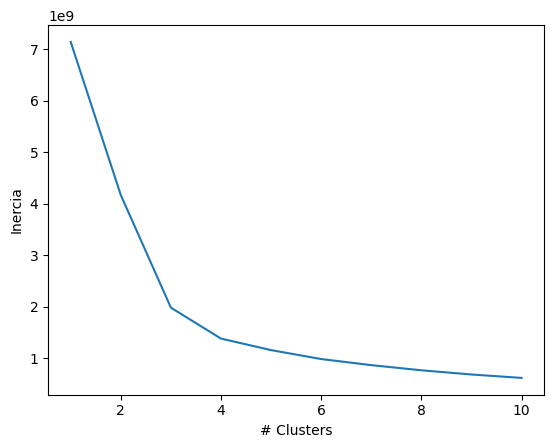

In [26]:
from sklearn.cluster import KMeans

# Calculamos la incercia para clusters de 1 a 10.
inercia= []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 100, random_state = 0)
    kmeans.fit(estaciones)
    inercia.append(kmeans.inertia_)

plt.plot(range(1, 11), inercia)
plt.xlabel('# Clusters')
plt.ylabel('Inercia')
plt.show()

Labels:  [0 0 0 ... 0 0 0]
Centroides:  [[ 7.88148388e-01  9.91722101e+02]
 [ 7.51474440e-01  6.86934595e+02]
 [ 8.62346142e-01 -2.00000000e+02]
 [ 8.17373455e-01  1.34904478e+03]]


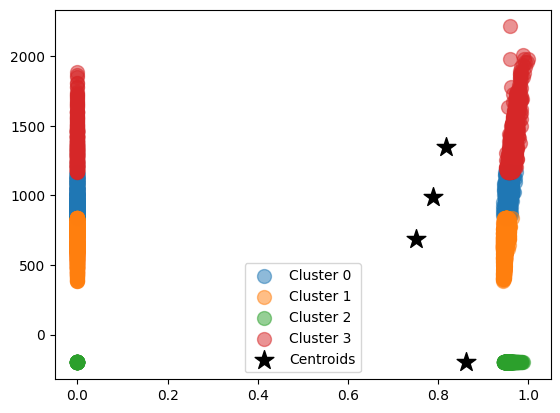

In [28]:
# Seleccionamos las variables weight y height.
estacionesWeightHeight = estaciones.iloc[:, [0, 4]].values

kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter = 100, n_init = 1) #Applying Kmeans classifier
kmeans = kmeans.fit(estacionesWeightHeight)

print('Labels: ', kmeans.labels_)
print('Centroides: ', kmeans.cluster_centers_)

# Visualizamos el resultado asignando a cada punto el valor de y_kmeans.
y_kmeans=kmeans.labels_
plt.scatter(estacionesWeightHeight[y_kmeans == 0, 0], estacionesWeightHeight[y_kmeans == 0, 1],s = 100, label = 'Cluster 0', alpha=0.5)
plt.scatter(estacionesWeightHeight[y_kmeans == 1, 0], estacionesWeightHeight[y_kmeans == 1, 1],s = 100, label = 'Cluster 1', alpha=0.5)
plt.scatter(estacionesWeightHeight[y_kmeans == 2, 0], estacionesWeightHeight[y_kmeans == 2, 1],s = 100, label = 'Cluster 2', alpha=0.5)
plt.scatter(estacionesWeightHeight[y_kmeans == 3, 0], estacionesWeightHeight[y_kmeans == 3, 1],s = 100, label = 'Cluster 3', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1], marker='*',s = 200, c = 'black',
            edgecolor='black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()